# Linear Regression

### model comprehension

In [1]:
#가상의 회귀분석용 데이터생성을 위한 패키지 임폴트
from sklearn.datasets import make_regression

In [32]:
X, y = make_regression(n_samples=200, n_features=1, bias=1, noise=3)
print('X:', X)
print('y:', y)

X: [[ 0.22122437]
 [-0.78781907]
 [ 1.97597808]
 [ 0.05356067]
 [-0.11306337]
 [ 1.52074469]
 [ 0.87845086]
 [-0.09015789]
 [ 0.59848219]
 [-0.30311019]
 [-0.10254608]
 [-0.38499   ]
 [ 1.83748018]
 [ 0.1615726 ]
 [-0.11777009]
 [ 0.0390701 ]
 [-0.47144785]
 [-0.49679973]
 [ 0.70490608]
 [-0.65065751]
 [ 0.23498073]
 [-0.66003437]
 [-0.42678733]
 [-1.32698474]
 [-0.9177327 ]
 [-1.07431376]
 [ 0.58104704]
 [ 0.11598431]
 [ 0.43210623]
 [-1.0903825 ]
 [-1.14488483]
 [ 0.44842708]
 [-1.81665939]
 [-0.36489787]
 [-0.21683039]
 [ 0.06149497]
 [-0.52569135]
 [-0.33076916]
 [-0.81688409]
 [-1.04293941]
 [ 0.7271947 ]
 [-0.0435631 ]
 [ 0.16188685]
 [-0.46628042]
 [ 2.18710972]
 [-1.10813471]
 [ 1.40127997]
 [-0.6852372 ]
 [-0.25808486]
 [ 1.04469861]
 [-0.48301923]
 [ 0.03101326]
 [ 0.60232955]
 [ 0.49102139]
 [ 0.45241564]
 [ 1.22223531]
 [ 1.14856089]
 [ 0.55635763]
 [-1.54458401]
 [-1.06619808]
 [ 1.0792907 ]
 [-0.91325156]
 [-0.22925239]
 [ 0.1137455 ]
 [ 0.15132135]
 [-0.44070599]
 [-0.77

In [33]:
#데이터 시각화를 위한 패키지 임폴트
from matplotlib import pyplot as plt #plt로 축약해서 사용하기 위해

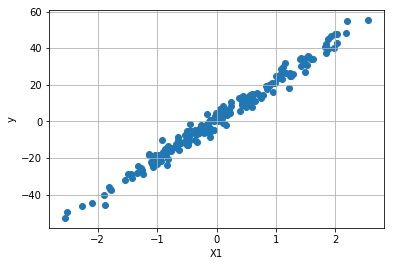

In [34]:
#산점도를 이용한 시각화 = scatter
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')
plt.grid()
plt.show()

In [35]:
#linearRegression 모델 사용을 위한 패키지 임폴트
from sklearn.linear_model import LinearRegression

In [36]:
# machinelearning할때 model을 LinearRegression으로 선택하겠다.
model = LinearRegression()

In [37]:
#trainset & testset split해주는 메서드를 임폴트
from sklearn.model_selection import train_test_split

In [38]:
#train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   shuffle=True)

In [39]:
#선택한 모델을 가지고 학습을 시키자.
model.fit(X_train, y_train) #fit <- trainset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#coef_ = weight(기울기), intercept_ = bias(y절편)
model.coef_, model.intercept_

(array([21.39349694]), 1.0852333583595062)

hypothesis 시각화

In [43]:
x = [-3, 4]
hypo = model.coef_ * x + model.intercept_

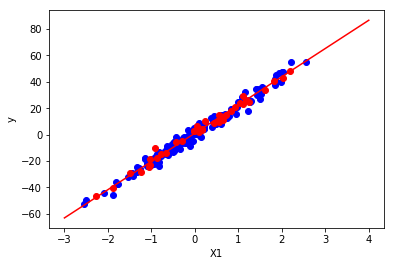

In [44]:
plt.plot(x, hypo, 'r')
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

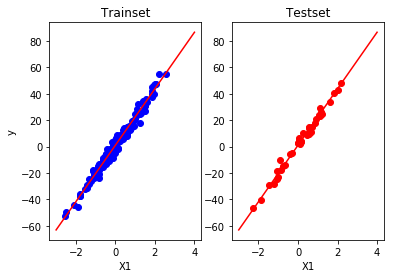

In [48]:
ax1 = plt.subplot(121)
plt.title('Trainset')
plt.plot(x, hypo, 'r')
plt.scatter(X_train, y_train, c='b')
plt.xlabel('X1')
plt.ylabel('y')

ax1 = plt.subplot(122)
plt.title('Testset')
plt.plot(x, hypo, 'r')
plt.scatter(X_test, y_test, c='r')
plt.xlabel('X1')

plt.show()

In [49]:
#model 검증(test)
acc_ts = model.score(X_test, y_test) # score <- trainset testset 각각
acc_tr = model.score(X_train, y_train)

In [64]:
def print_accuracy(acc_tr, acc_ts):
    print('='*18)
    print('---- Accuracy ----')
    print('='*18)
    print('{:>8} : {:.4f}'.format('trainset', acc_tr))
    print('{:>8} : {:.4f}'.format('testset', acc_ts))
    print('='*18)    

In [65]:
print_accuracy(acc_tr, acc_ts)

---- Accuracy ----
trainset : 0.9816
 testset : 0.9876


#### Example Practice

In [67]:
from sklearn.datasets import load_boston

In [68]:
boston = load_boston()
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

boston가의 부동산 가치 예측 모델을 완성해보자.

In [69]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [70]:
boston['data'] #x_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [71]:
boston['target'] #y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [72]:
boston['data'].shape

(506, 13)

In [73]:
boston['target'].shape

(506,)

In [74]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(boston['data'], boston['target'],
                                         test_size=0.2,
                                         shuffle=True)

In [77]:
#model training
model = LinearRegression()
model.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
#model testing
acc_ts = model.score(X_ts, y_ts)
acc_tr = model.score(X_tr, y_tr)
print_accuracy(acc_tr, acc_ts)

---- Accuracy ----
trainset : 0.7384
 testset : 0.7384
